In [189]:
# from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [190]:
# 데이터세트 전처리 및 준비
train_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=0.2,
)

In [191]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

In [192]:
train_flow = train_generator.flow_from_directory(
    directory="get_eye/samples/train",
    shuffle=True,
    target_size=(80, 80),
    class_mode="categorical",
    batch_size=8,
    subset= "training" # training, test, validation
)

Found 74 images belonging to 4 classes.


In [193]:
val_flow = train_generator.flow_from_directory(
    directory="get_eye/samples/train",
    shuffle=True,
    target_size=(80, 80),
    class_mode="categorical",
    batch_size=8,
    subset= "validation" # training, test, validation
)

Found 16 images belonging to 4 classes.


In [194]:
test_flow = test_generator.flow_from_directory(
    directory="get_eye/samples/test",
    shuffle=False,
    target_size=(80, 80),
    class_mode="categorical",
    batch_size=8,
)

Found 12 images belonging to 4 classes.


In [195]:
# model = Sequential()
# pretrained_model = InceptionV3(
#     weights="imagenet",
#     input_shape=(75, 75, 3),
#     include_top=False,  # 출력층을 배제하겠다.
# )
# model.add(pretrained_model)
# model.add(Flatten())
# model.add(Dense(8))
# model.add(Dense(4, activation="softmax"))

model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',
                 padding="valid", input_shape=(80, 80, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',
                 padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [196]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_760 (Conv2D)         (None, 78, 78, 8)         224       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 39, 39, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_761 (Conv2D)         (None, 37, 37, 8)         584       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 18, 18, 8)         0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 2592)              0         
                                                                 
 dense_17 (Dense)            (None, 256)             

In [197]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [198]:
hist = model.fit(train_flow, epochs=30,
                 validation_data=val_flow)

Epoch 1/30
10/10 [==============================] - 2s 44ms/step - loss: 1.3959 - accuracy: 0.3378 - val_loss: 1.2949 - val_accuracy: 0.5625
Epoch 2/30
10/10 [==============================] - 0s 24ms/step - loss: 1.2013 - accuracy: 0.6757 - val_loss: 1.0780 - val_accuracy: 0.6250
Epoch 3/30
10/10 [==============================] - 0s 24ms/step - loss: 0.9429 - accuracy: 0.6351 - val_loss: 0.8203 - val_accuracy: 0.8750
Epoch 4/30
10/10 [==============================] - 0s 27ms/step - loss: 0.6685 - accuracy: 0.9324 - val_loss: 0.5613 - val_accuracy: 0.8750
Epoch 5/30
10/10 [==============================] - 0s 23ms/step - loss: 0.4243 - accuracy: 0.8919 - val_loss: 0.3170 - val_accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - 0s 25ms/step - loss: 0.2445 - accuracy: 0.9459 - val_loss: 0.1668 - val_accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - 0s 24ms/step - loss: 0.1463 - accuracy: 0.9865 - val_loss: 0.0987 - val_accuracy: 1.0000
Epoch 8/30
10

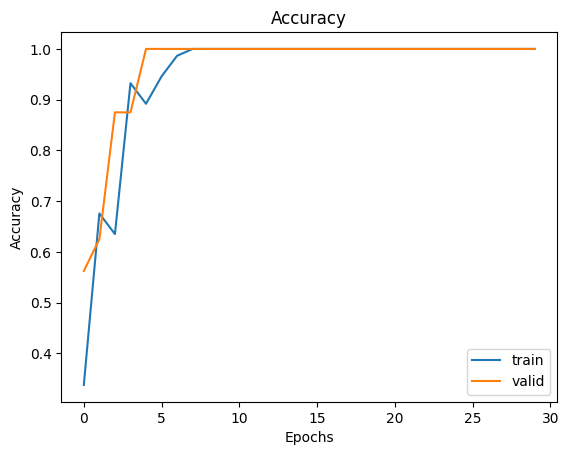

In [199]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend(["train", "valid"])
plt.show()

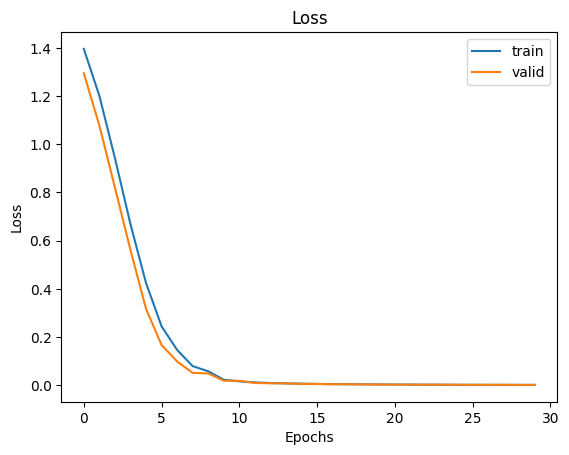

In [200]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend(["train", "valid"])
plt.show()

In [201]:
test_loss, test_acc = model.evaluate(test_flow)
print("test loss:", test_loss)
print("test accuracy:", test_acc)

2/2 [==============================] - 0s 9ms/step - loss: 0.0467 - accuracy: 1.0000
test loss: 0.0467379204928875
test accuracy: 1.0


In [210]:
from keras.preprocessing import image

ground_truth = "lb"

img = image.load_img(f"./get_eye/samples/test/{ground_truth}/{ground_truth}_image0_0.png",
                     target_size=(80, 80))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [211]:
result_dict = {0: 'lb', 1: 'lt', 2: 'rb', 3: 'rt'}

print(model.predict(img, verbose=0))
print(result_dict[model.predict(img, verbose=0).argmax()])

[[0. 0. 1. 0.]]
rb
